# 심리성향예측AI경진대회

### 데이터 설명(출처: Dacon)

* index
* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
* Qa : Secret
* Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.
* Qc : Anyone who completely trusts anyone else is asking for trouble.
* Qd : Secret
* Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.
* Qf : There is no excuse for lying to someone else.
* Qg : Secret
* Qh : Most people forget more easily the death of their parents than the loss of their property.
* Qi : Secret
* Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.
* Qk : All in all, it is better to be humble and honest than to be important and dishonest.
* QI : Secret
* Qm : It is hard to get ahead without cutting corners here and there.
* Qn : Secret
* Qo : The best way to handle people is to tell them what they want to hear.
* Qp : Secret
* Qq : Most people are basically good and kind.
* Qr : One should take action only when sure it is morally right.
* Qs : It is wise to flatter important people.
* Qt : Secret
* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준- 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어- 1=Yes, 2=No, 0=무응답


* familysize : 형제자매 수


* gender : 성별- Male, Female


* hand : 필기하는 손- 1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태- 1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종- Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교- Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that- tp01 : Extraverted, enthusiastic.- tp02 : Critical, quarrelsome.
- tp03 : Dependable, self-disciplined.- tp04 : Anxious, easily upset. - tp05 : Open to new experiences, complex.- tp06 : Reserved, quiet.- tp07 : Sympathetic, warm.- tp08 : Disorganized, careless.- tp09 : Calm, emotionally stable.- tp10 : Conventional, uncreative.
								
							


#### 순서형 변수
* urban : 유년기의 거주 구역 - 1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답

* wr_(01~13) : 실존하는 해당 단어의 정의을 앎- 1=Yes, 0=No

* wf_(01~03) : 허구인 단어의 정의를 앎- 1=Yes, 0=No

#### target
* voted (타겟): 지난 해 국가 선거 투표 여부- 1=Yes, 2=No


In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

## 데이터 불러오기

In [2]:
# 데이터 불러오기
train= pd.read_csv('C:/Users/82102/Desktop/opendata/train.csv')
train

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,...,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,...,1,1,0,1,1,1,1,0,1,1
45528,45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,...,1,1,0,1,1,1,1,0,1,1
45529,45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,...,1,1,0,1,1,0,1,0,1,1
45530,45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,...,1,1,0,1,1,1,1,0,1,1


In [3]:
test= pd.read_csv('C:/Users/82102/Desktop/opendata/test_x.csv')
test

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,736,2.0,2941,3.0,4621,1.0,4857,2.0,...,0,1,0,0,1,0,1,0,1,1
1,1,3.0,514,2.0,1952,3.0,1552,3.0,821,4.0,...,0,0,0,0,0,0,0,0,0,0
2,2,3.0,500,2.0,2507,4.0,480,2.0,614,2.0,...,0,1,0,1,1,0,1,0,1,1
3,3,1.0,669,1.0,1050,5.0,1435,2.0,2252,5.0,...,1,1,1,1,1,1,1,1,1,1
4,4,2.0,499,1.0,1243,5.0,845,2.0,1666,2.0,...,1,1,0,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,...,1,1,0,1,1,0,1,0,1,1
11379,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,...,1,1,1,1,1,1,1,1,1,1
11380,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,...,1,1,0,1,1,0,1,0,1,1
11381,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,...,1,0,0,1,1,0,1,1,1,0


In [4]:
submission = pd.read_csv('C:/Users/82102/Desktop/opendata/sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

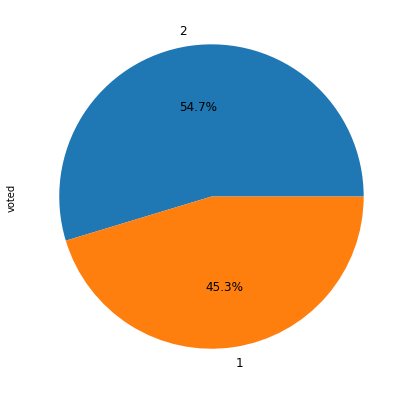

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
train['voted'].value_counts().plot.pie(ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

* 1- YES, 2- No
* 타겟 데이터의 불균형 발견되지 않음

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

## 인코딩

In [8]:
data = train.drop('voted',axis=1)
target = train['voted']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

In [10]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

## 모델링

### 로지스틱 회귀

In [11]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_val)

In [12]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lr_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, lr_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, lr_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy:0.5746
precision: 0.6141
recall: 0.1835
roc_auc: 0.5433


### NaiveBayes(GaussianNB, BernoulliNB, MultinomialNB)

In [13]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [14]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_val)

In [15]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, gnb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, gnb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, gnb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, gnb_preds)))

accuracy:0.4565
precision: 0.4560
recall: 0.9880
roc_auc: 0.4990


In [16]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
bnb_preds = bnb.predict(X_val)

In [17]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, bnb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, bnb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, bnb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, bnb_preds)))

accuracy:0.6734
precision: 0.6291
recall: 0.6936
roc_auc: 0.6750


In [18]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_preds = mnb.predict(X_val)

In [19]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, mnb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, mnb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, mnb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, mnb_preds)))

accuracy:0.4565
precision: 0.4565
recall: 1.0000
roc_auc: 0.5000


### RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_val)

In [22]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, rf_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,rf_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, rf_preds)))

accuracy:0.6925
precision: 0.6392
recall: 0.7492
roc_auc: 0.6970


from sklearn.model_selection import GridSearchCV
rf_param_grid={
    'n_estimators': [100,200],
    'max_depth': [6,8,10,12],
    'min_samples_leaf':[3,5,7,10],
    'min_samples_split':[2,3,5,10]
}

rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='accuracy',n_jobs=-1, verbose=1)
rf_grid.fit(X_train,y_train)

print("최고 평균 정확도: {0:.4f}".format(rf_grid.best_score_))
print("최고 파라미터: ", rf_grid.best_params_)

* 너무 오래걸려서,,

### catboost

In [23]:
from catboost import CatBoostClassifier
cb= CatBoostClassifier()
cb.fit(X_train,y_train)
cb_preds= cb.predict(X_val)

Learning rate set to 0.045174
0:	learn: 0.6792609	total: 235ms	remaining: 3m 54s
1:	learn: 0.6694466	total: 264ms	remaining: 2m 11s
2:	learn: 0.6606041	total: 291ms	remaining: 1m 36s
3:	learn: 0.6527131	total: 323ms	remaining: 1m 20s
4:	learn: 0.6431956	total: 349ms	remaining: 1m 9s
5:	learn: 0.6367895	total: 379ms	remaining: 1m 2s
6:	learn: 0.6307995	total: 417ms	remaining: 59.1s
7:	learn: 0.6260069	total: 485ms	remaining: 1m
8:	learn: 0.6190178	total: 516ms	remaining: 56.8s
9:	learn: 0.6149289	total: 550ms	remaining: 54.4s
10:	learn: 0.6108259	total: 612ms	remaining: 55s
11:	learn: 0.6057928	total: 709ms	remaining: 58.4s
12:	learn: 0.6026854	total: 772ms	remaining: 58.6s
13:	learn: 0.5998763	total: 851ms	remaining: 59.9s
14:	learn: 0.5957946	total: 990ms	remaining: 1m 5s
15:	learn: 0.5934399	total: 1.05s	remaining: 1m 4s
16:	learn: 0.5915891	total: 1.13s	remaining: 1m 5s
17:	learn: 0.5888777	total: 1.17s	remaining: 1m 4s
18:	learn: 0.5866172	total: 1.25s	remaining: 1m 4s
19:	learn: 0

163:	learn: 0.5436181	total: 9.02s	remaining: 46s
164:	learn: 0.5435053	total: 9.07s	remaining: 45.9s
165:	learn: 0.5433869	total: 9.12s	remaining: 45.8s
166:	learn: 0.5432673	total: 9.17s	remaining: 45.7s
167:	learn: 0.5431020	total: 9.21s	remaining: 45.6s
168:	learn: 0.5429662	total: 9.26s	remaining: 45.6s
169:	learn: 0.5428780	total: 9.31s	remaining: 45.5s
170:	learn: 0.5427541	total: 9.37s	remaining: 45.4s
171:	learn: 0.5426587	total: 9.43s	remaining: 45.4s
172:	learn: 0.5425189	total: 9.47s	remaining: 45.3s
173:	learn: 0.5424083	total: 9.51s	remaining: 45.2s
174:	learn: 0.5423156	total: 9.56s	remaining: 45.1s
175:	learn: 0.5422236	total: 9.6s	remaining: 44.9s
176:	learn: 0.5420862	total: 9.63s	remaining: 44.8s
177:	learn: 0.5419571	total: 9.67s	remaining: 44.7s
178:	learn: 0.5418225	total: 9.73s	remaining: 44.6s
179:	learn: 0.5418149	total: 9.76s	remaining: 44.4s
180:	learn: 0.5417309	total: 9.8s	remaining: 44.3s
181:	learn: 0.5415936	total: 9.83s	remaining: 44.2s
182:	learn: 0.54

325:	learn: 0.5200945	total: 16.6s	remaining: 34.4s
326:	learn: 0.5199607	total: 16.7s	remaining: 34.4s
327:	learn: 0.5197965	total: 16.7s	remaining: 34.3s
328:	learn: 0.5196884	total: 16.8s	remaining: 34.2s
329:	learn: 0.5195387	total: 16.8s	remaining: 34.1s
330:	learn: 0.5193809	total: 16.9s	remaining: 34.1s
331:	learn: 0.5192222	total: 16.9s	remaining: 34.1s
332:	learn: 0.5190496	total: 17s	remaining: 34s
333:	learn: 0.5189094	total: 17s	remaining: 33.9s
334:	learn: 0.5187427	total: 17s	remaining: 33.8s
335:	learn: 0.5185637	total: 17.1s	remaining: 33.8s
336:	learn: 0.5184486	total: 17.1s	remaining: 33.7s
337:	learn: 0.5183108	total: 17.2s	remaining: 33.7s
338:	learn: 0.5181519	total: 17.2s	remaining: 33.6s
339:	learn: 0.5180117	total: 17.3s	remaining: 33.6s
340:	learn: 0.5177901	total: 17.4s	remaining: 33.6s
341:	learn: 0.5176275	total: 17.4s	remaining: 33.5s
342:	learn: 0.5174755	total: 17.5s	remaining: 33.5s
343:	learn: 0.5173119	total: 17.5s	remaining: 33.4s
344:	learn: 0.517173

488:	learn: 0.4962401	total: 24.7s	remaining: 25.8s
489:	learn: 0.4961018	total: 24.7s	remaining: 25.7s
490:	learn: 0.4959406	total: 24.8s	remaining: 25.7s
491:	learn: 0.4958283	total: 24.8s	remaining: 25.6s
492:	learn: 0.4957055	total: 24.8s	remaining: 25.5s
493:	learn: 0.4954712	total: 24.9s	remaining: 25.5s
494:	learn: 0.4953127	total: 24.9s	remaining: 25.4s
495:	learn: 0.4951765	total: 25s	remaining: 25.4s
496:	learn: 0.4950363	total: 25s	remaining: 25.3s
497:	learn: 0.4949198	total: 25s	remaining: 25.2s
498:	learn: 0.4948034	total: 25.1s	remaining: 25.2s
499:	learn: 0.4946325	total: 25.1s	remaining: 25.1s
500:	learn: 0.4945164	total: 25.2s	remaining: 25.1s
501:	learn: 0.4943528	total: 25.2s	remaining: 25s
502:	learn: 0.4942271	total: 25.3s	remaining: 25s
503:	learn: 0.4941050	total: 25.3s	remaining: 24.9s
504:	learn: 0.4939693	total: 25.3s	remaining: 24.8s
505:	learn: 0.4938181	total: 25.4s	remaining: 24.8s
506:	learn: 0.4936775	total: 25.4s	remaining: 24.7s
507:	learn: 0.4935267	

651:	learn: 0.4749646	total: 32.7s	remaining: 17.4s
652:	learn: 0.4748303	total: 32.7s	remaining: 17.4s
653:	learn: 0.4747194	total: 32.8s	remaining: 17.3s
654:	learn: 0.4746440	total: 32.8s	remaining: 17.3s
655:	learn: 0.4745239	total: 32.9s	remaining: 17.2s
656:	learn: 0.4743822	total: 32.9s	remaining: 17.2s
657:	learn: 0.4742669	total: 33s	remaining: 17.2s
658:	learn: 0.4740772	total: 33.1s	remaining: 17.1s
659:	learn: 0.4739411	total: 33.1s	remaining: 17.1s
660:	learn: 0.4738123	total: 33.2s	remaining: 17s
661:	learn: 0.4736613	total: 33.2s	remaining: 17s
662:	learn: 0.4735250	total: 33.3s	remaining: 16.9s
663:	learn: 0.4733729	total: 33.3s	remaining: 16.9s
664:	learn: 0.4732354	total: 33.4s	remaining: 16.8s
665:	learn: 0.4731381	total: 33.4s	remaining: 16.8s
666:	learn: 0.4730148	total: 33.5s	remaining: 16.7s
667:	learn: 0.4728771	total: 33.6s	remaining: 16.7s
668:	learn: 0.4727479	total: 33.6s	remaining: 16.6s
669:	learn: 0.4726033	total: 33.7s	remaining: 16.6s
670:	learn: 0.4724

810:	learn: 0.4556777	total: 40.6s	remaining: 9.46s
811:	learn: 0.4555572	total: 40.7s	remaining: 9.41s
812:	learn: 0.4554534	total: 40.7s	remaining: 9.36s
813:	learn: 0.4553401	total: 40.7s	remaining: 9.31s
814:	learn: 0.4552505	total: 40.8s	remaining: 9.26s
815:	learn: 0.4551054	total: 40.8s	remaining: 9.21s
816:	learn: 0.4549622	total: 40.9s	remaining: 9.15s
817:	learn: 0.4548496	total: 40.9s	remaining: 9.1s
818:	learn: 0.4547155	total: 41s	remaining: 9.05s
819:	learn: 0.4545819	total: 41s	remaining: 9s
820:	learn: 0.4544559	total: 41.1s	remaining: 8.95s
821:	learn: 0.4543348	total: 41.1s	remaining: 8.9s
822:	learn: 0.4542320	total: 41.2s	remaining: 8.85s
823:	learn: 0.4541415	total: 41.2s	remaining: 8.8s
824:	learn: 0.4540090	total: 41.3s	remaining: 8.75s
825:	learn: 0.4538961	total: 41.3s	remaining: 8.7s
826:	learn: 0.4537922	total: 41.3s	remaining: 8.65s
827:	learn: 0.4536744	total: 41.4s	remaining: 8.6s
828:	learn: 0.4535434	total: 41.4s	remaining: 8.54s
829:	learn: 0.4534444	to

971:	learn: 0.4378912	total: 48.8s	remaining: 1.41s
972:	learn: 0.4377654	total: 48.9s	remaining: 1.35s
973:	learn: 0.4376812	total: 48.9s	remaining: 1.3s
974:	learn: 0.4375985	total: 48.9s	remaining: 1.25s
975:	learn: 0.4374866	total: 49s	remaining: 1.2s
976:	learn: 0.4374070	total: 49s	remaining: 1.15s
977:	learn: 0.4373056	total: 49.1s	remaining: 1.1s
978:	learn: 0.4371711	total: 49.1s	remaining: 1.05s
979:	learn: 0.4370729	total: 49.2s	remaining: 1s
980:	learn: 0.4369877	total: 49.2s	remaining: 954ms
981:	learn: 0.4368565	total: 49.3s	remaining: 904ms
982:	learn: 0.4367484	total: 49.4s	remaining: 854ms
983:	learn: 0.4366662	total: 49.4s	remaining: 803ms
984:	learn: 0.4365569	total: 49.5s	remaining: 753ms
985:	learn: 0.4364150	total: 49.5s	remaining: 703ms
986:	learn: 0.4363406	total: 49.6s	remaining: 653ms
987:	learn: 0.4362179	total: 49.6s	remaining: 603ms
988:	learn: 0.4360895	total: 49.7s	remaining: 552ms
989:	learn: 0.4359863	total: 49.7s	remaining: 502ms
990:	learn: 0.4358489	

In [24]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, cb_preds)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, cb_preds)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test,cb_preds)))
# ROC_AUC
print('roc_auc: {:0.4f}'.format(roc_auc_score(y_test, cb_preds)))

accuracy:0.6974
precision: 0.6496
recall: 0.7320
roc_auc: 0.7002


#

In [27]:
test_ohe = pd.get_dummies(test)

In [37]:
test_cb_preds = cb.predict(test_ohe)
test_cb_preds

array([2, 2, 1, ..., 1, 1, 2], dtype=int64)

In [35]:
test_rf_preds = rf.predict(test_ohe)
test_rf_preds

array([2, 2, 2, ..., 1, 1, 2], dtype=int64)

In [38]:
test_bnb_preds = bnb.predict(test_ohe)
test_bnb_preds

array([2, 2, 2, ..., 1, 1, 2], dtype=int64)

In [40]:
submission['voted'] = test_cb_preds

In [41]:
submission

,index,voted
0,0,2
1,1,2
2,2,1
3,3,1
4,4,2
...,...,...
11378,11378,1
11379,11379,2
11380,11380,1
11381,11381,1


In [44]:
submission.to_csv("final.csv", index = False)